# Super Resolution Inference

In [ ]:
# Do one of these
# !pip install fastai
# !conda install -c pytorch -c fastai fastai



In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

Defining paths

In [86]:
#Change this to where you wanna do stuff, if you are cool with doing it in the current dir, leave this be
path = Path('./')

#Weights are in here.
path_cropped_130 = path/'small-100'
path_cropped_130.mkdir(exist_ok=True)


Downloading weights

In [87]:
!~/.local/bin/megaget /Root/Datasets/SuperRes/Models/1_small-100/export.pkl --path small-100/export.pkl  --username jamesjuanwhei.tan@taylorssj.com --password omdenafwp


Downloaded export.pkl33;1m98.51% - 235.7 MiB (247118080 bytes) of 239.2 MiB (18.1 MiB/s)


In [93]:
learn = load_learner(path_cropped_130)

Get something to test it on.

In [ ]:
!~/.local/bin/megaget /Root/Datasets/SuperRes/test_images.zip --username jamesjuanwhei.tan@taylorssj.com --password omdenafwp
!unzip test_images.zip

In [89]:
items_path = Path('drive-download-20190625T053445Z-001/')
items_path.ls()

[PosixPath('drive-download-20190625T053445Z-001/00008.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00006.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00001.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00005.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00003.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00002.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00004.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00007.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00000.tif'),
 PosixPath('drive-download-20190625T053445Z-001/00009.tif')]

### Output size
Can change this according to our needs.

In [94]:
#this can be changed
size = (500,500)

In [95]:
data = (ImageImageList.from_folder(items_path).split_by_rand_pct(0.1, seed=42)
          .label_from_func(lambda x: items_path/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data.c = 3

In [96]:
learn.data = data

In [107]:
def superres_1(inp):
    img = open_image(inp);    
    p,img_hr,b = learn.predict(img)
    return img_hr

In [110]:
hrs = []
for p in items_path.ls():
        hrs += [superres_1(p)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

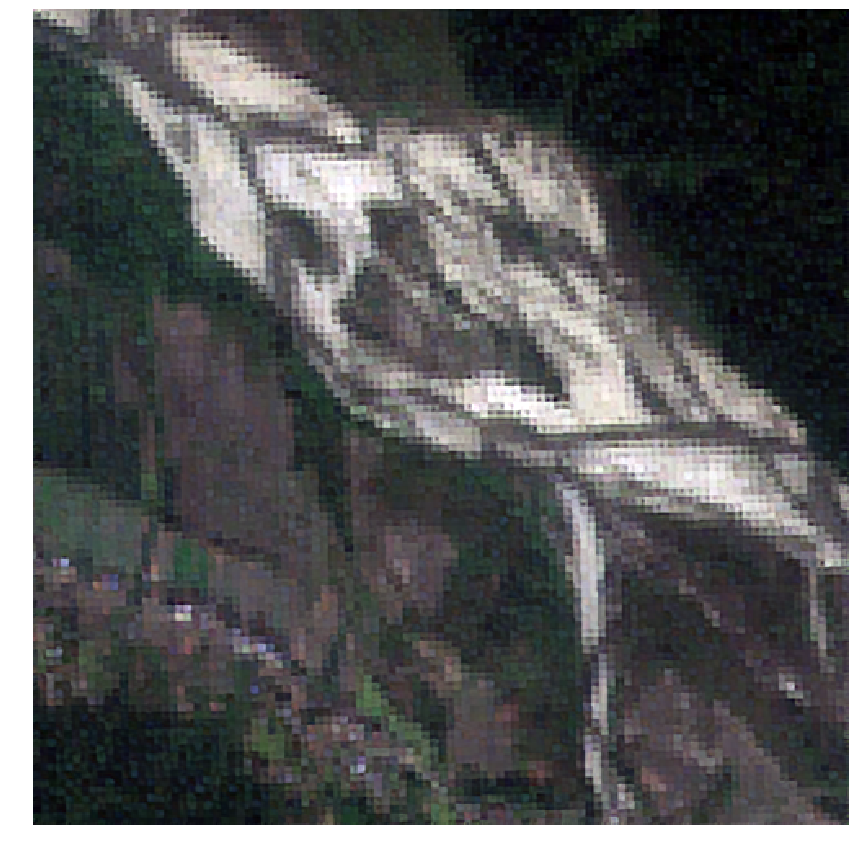

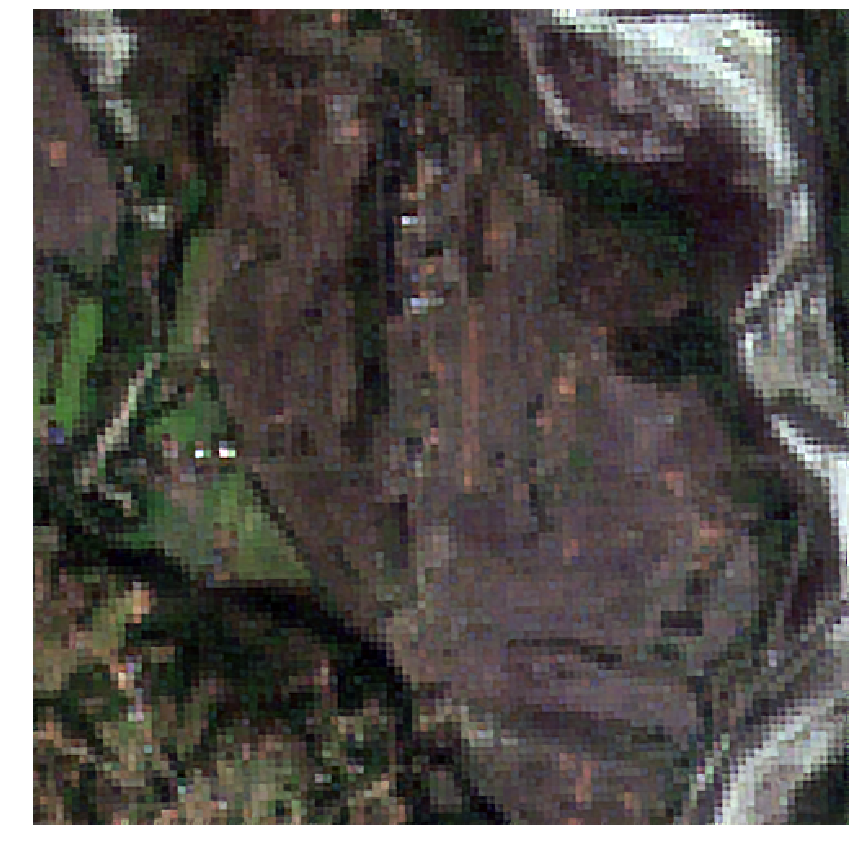

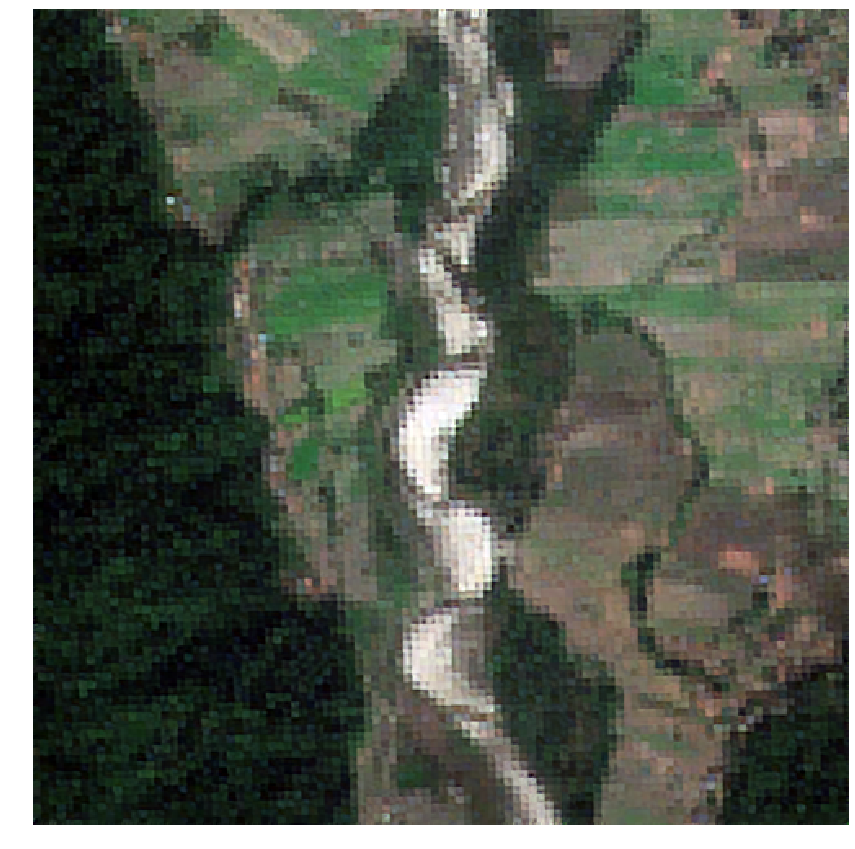

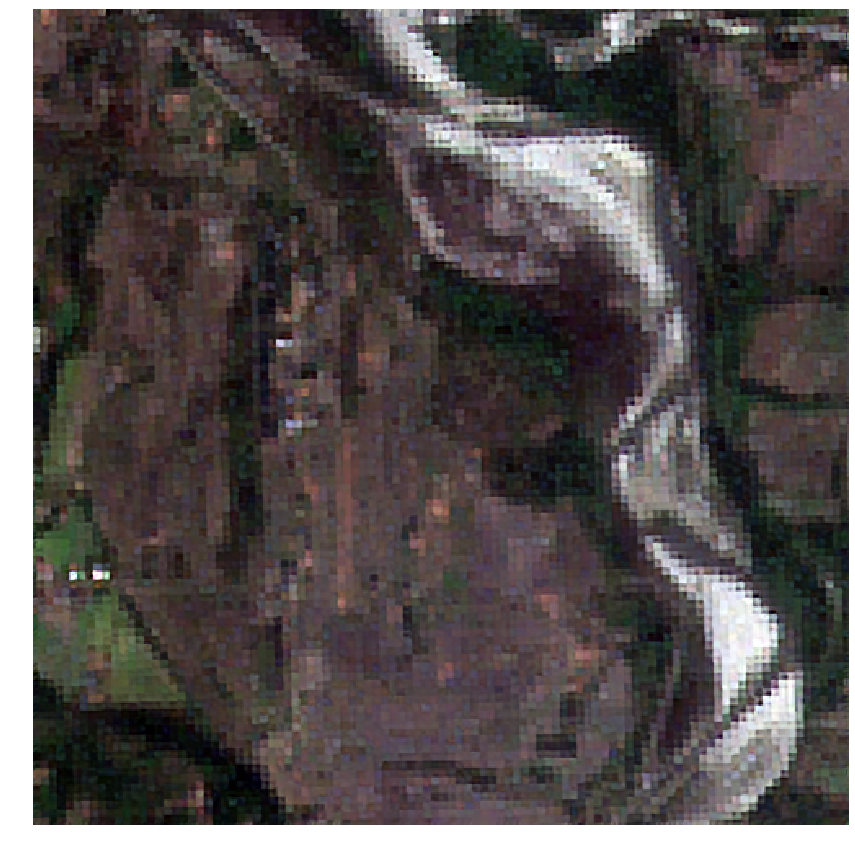

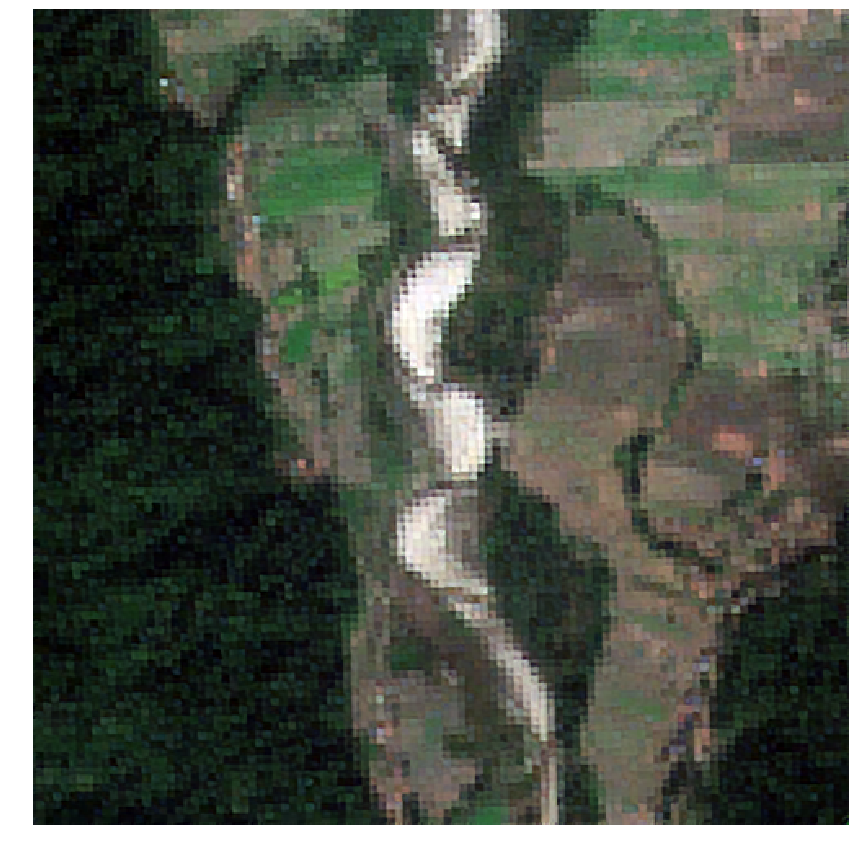

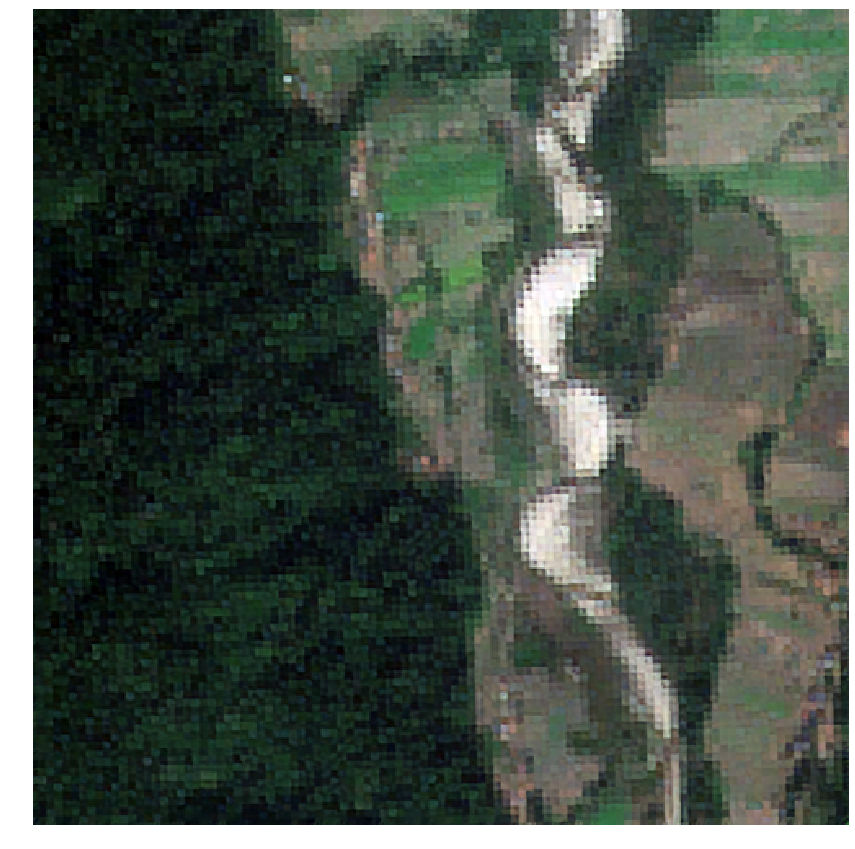

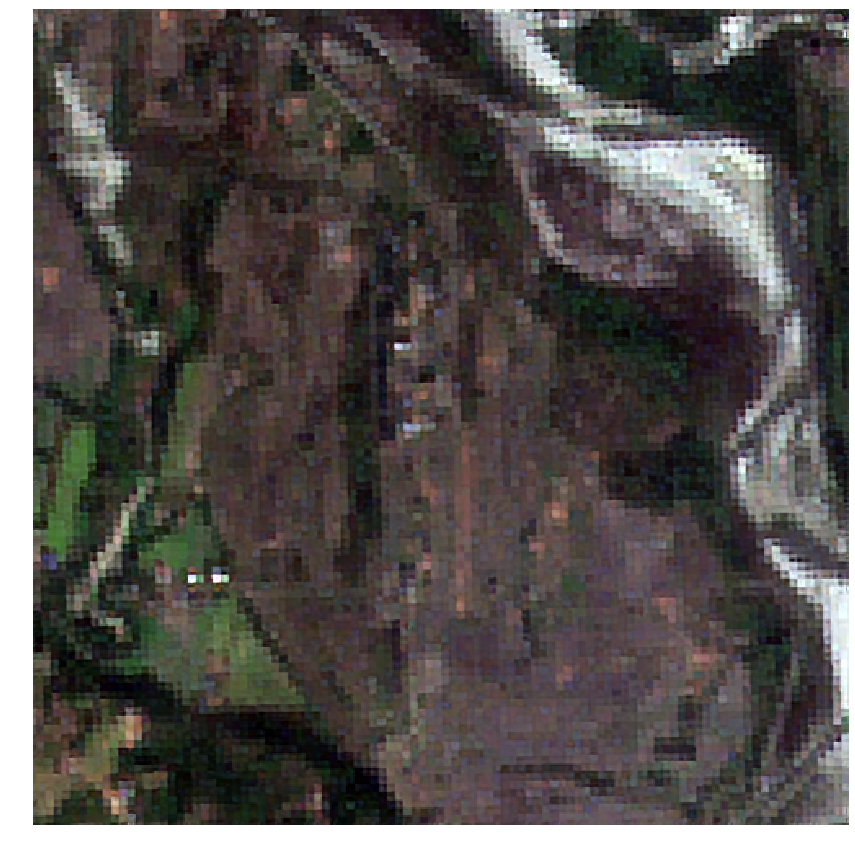

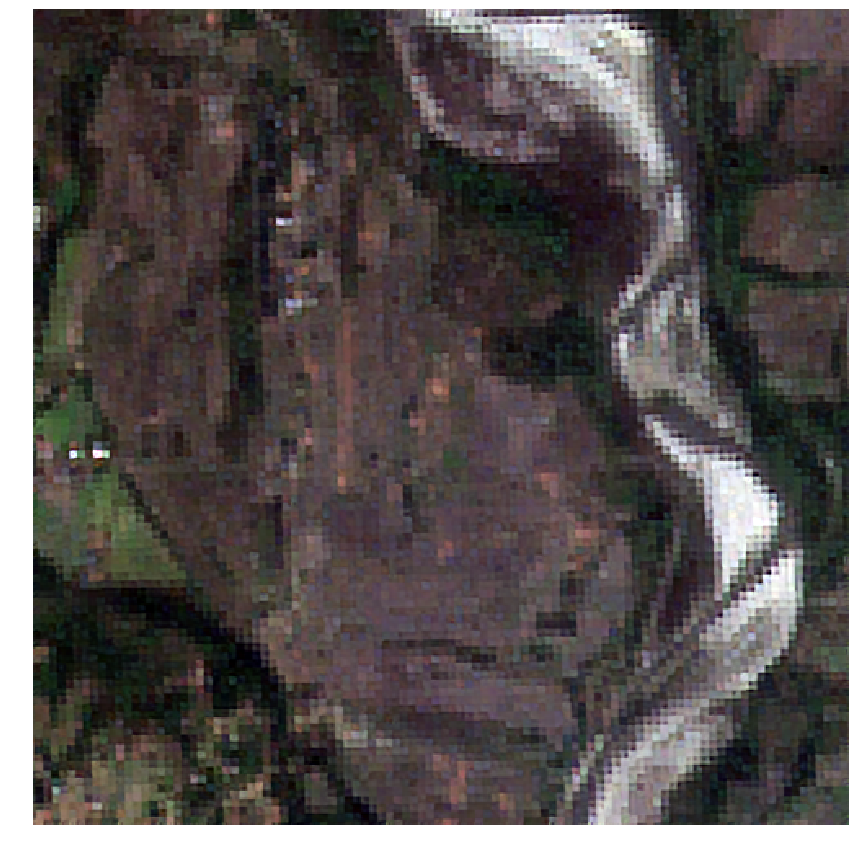

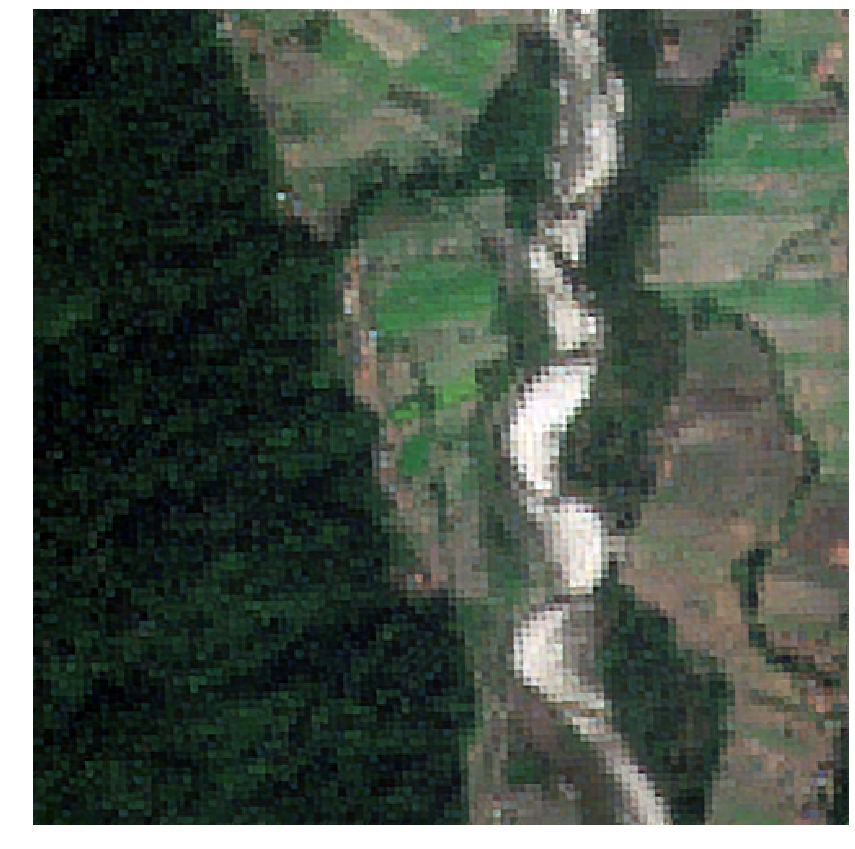

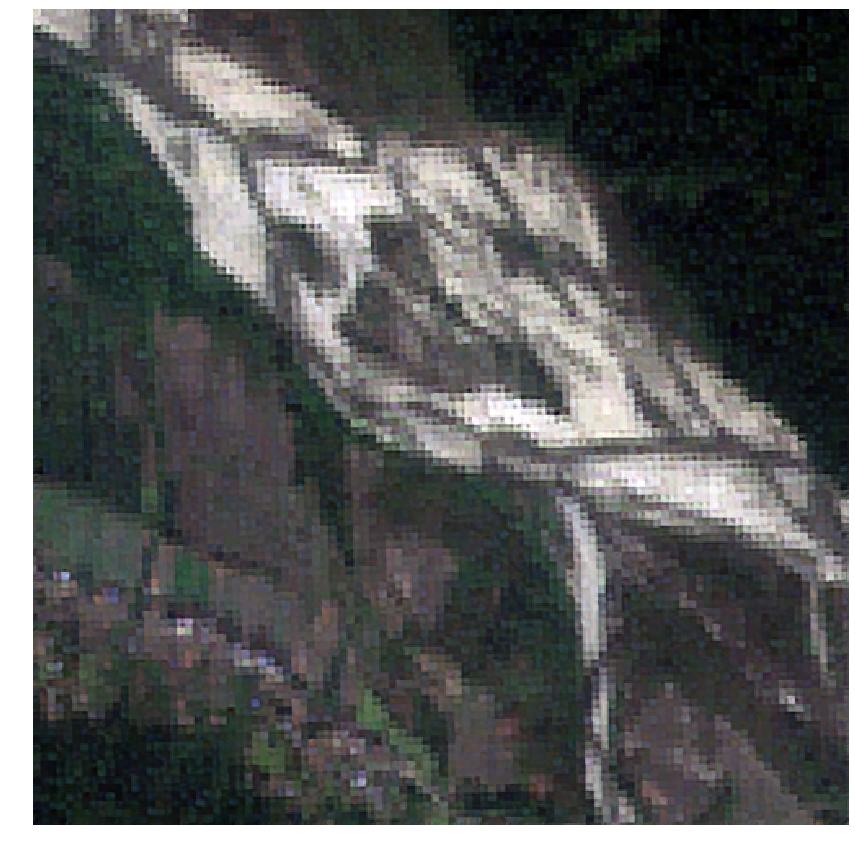

In [112]:
for hr in hrs:
    Image(hr).show(figsize=(18,15))

# Saving Files
You can probably add this to the loop up there.

In [118]:
from PIL import Image as img

In [144]:
import cv2

In [133]:
img = Image(hrs[0])

In [149]:
cv2.imwrite('test.png',cv2.cvtColor(image2np(img.data*255), cv2.COLOR_RGB2BGR))

True

In [150]:
#Check if it is saved.
!ls

 Decrappification.ipynb     drive-download-20190625T053445Z-001   test.png
'SuperRes Pipeline.ipynb'   small-100
